# CS 237 Spring 2021, HW 09 

#### Due date: Thursday April 8th at Midnight (1 minute after 11:59pm on 4/8) via Gradescope (with a 6 hour grace period)

<strong> Late policy:</strong> You may submit the homework up to 24 hours late for a 10% penalty. Hence, the late deadline is Friday 4/9 at Midnight (with a 6 hour grace period). 

#### General Instructions

Please complete this notebook by filling in solutions where indicated. 

For full credit, please take careful note of the following requirements:

- Do NOT use any HTML tags in your notebook, as Gradescope will ignore them;

- Do NOT answer questions by including images, as Gradescope will ignore them; and 

- You MUST  "Restart and Run All" from the Kernel menu before submitting to Gradescope.

**Any assignments which do not follow these requirements will not receive full credit.** 



There are 8 problems on this homework, the last of which is a "lab" problem; many will involve using Python to solve, using the functions in the next code cell. Each problem is worth 7.5 points. An introductory video will be posted on YT for
the analytical problems, and the lab problem will be covered Friday in lab. 

In [27]:
# Here are some imports which will be used in code that we write for CS 237

import matplotlib.pyplot as plt   # normal plotting
import numpy as np

from math import log, pi, log, floor, ceil, sqrt       # import whatever you want from math
from random import seed, random
from collections import Counter

%matplotlib inline

from scipy.special import comb
           
def C(N,K):    
    return comb(N,K,True)     # just a wrapper around the scipy function


# Here are the basic statistical functions we will use from numpy

from numpy import mean, var, std, median

L = [2,4,3,6,4,5]

# mean value

mean(L)          


# Variance
#  ddof = delta degrees of freedom, default is 0

# population variance
var(L)      

# sample variance
var(L,ddof=1)

# Standard deviation
#  ddof = delta degrees of freedom, default is 0

# population standard deviation
std(L)      

# sample standard deviation
std(L,ddof=1)  

# Median

median(L)  

# Random sampling of `size` elements from list with or without replacement

np.random.choice(L,size=1,replace=True)
       
# Scipy statistical functions

from scipy.stats import norm, binom, expon, geom, poisson, gamma, nbinom, bernoulli                 

# https://docs.scipy.org/doc/scipy/reference/stats.html

#### Normal Distribution    #####

######   Note that in this library loc = mean and scale = standard deviation  #####

# Examples assume random variable X (e.g., housing prices) normally distributed with  mu = 60, sigma = 10

# Probability Density Function    (really only useful for drawing the curve)
#  f(x) = P(X == x)

norm.pdf(x=50,loc=60, scale= 10)     

# Cumulative Density Function
#  F(x) = P(X < x)

# Example:  Percentage of houses less than 50K. 
norm.cdf(x=50,loc=60,scale=10) 

# Example:  Find P(60<X<80)
norm.cdf(x=80,loc=60,scale=40) - norm.cdf(x=60,loc=60,scale=40)

# Survival Function: Simply 1 - CDF, i.e., P(X > x)

# Example:  Percentage of houses more than 50K.
norm.sf(x=50,loc=60,scale=10) 

# Percentage Point Function: Inverse of the CDF:
# For what is the largest value of k for which P( X < k ) = q  ?

# Example: What is the maximum cost of the 5% cheapest houses, 
# i.e., the x such that P(X < x) = 0.05?

norm.ppf(q=0.05,loc=60,scale=40)

# Inverse Survival Function: Inverse (1 - CDF):
# For what is the smallest value of k for which P( X > k ) = q  ?

# Example: What is the minimum cost of the 5% most expensive houses, 
# i.e., the x such that P(X > x) = 0.05?

norm.isf(q=0.05,loc=60,scale=40)

#   Give the endpoints of the interval (centered on the mean)
#   which contain alpha/100 percent of the population (alpha is a probability)

# Ex. Give the interval for the middle 75% of the houses

norm.interval(alpha=0.75, loc=60, scale=40)

# generate a random variate
norm.rvs(loc=60, scale=40)

# generate random variates, returns list of length = size
norm.rvs(loc=60, scale=40, size=10)




##### Bernoulli Distribution  X ~ Bernoulli(p)  ####

#  p = probability of success for Bernoulli trial

# Generate a random variate
bernoulli.rvs(p=0.5)

# Generate a list of random variates
bernoulli.rvs(p=0.5,size=100)

##### Binomial Distribution  X ~ B(n,p)  ####

#  n = number of independent Bernoulli trials
#  p = probability of success for Bernoulli trial
#  k = outcome in range [0 .. n]

# Generate a random variate
binom.rvs(n=10, p=0.5)

# Generate a list of random variates
binom.rvs(n=10, p=0.5,size=100)

# Probability mass function.
binom.pmf(k=4, n=10, p=0.5)

# Cumulative distribution function
binom.cdf(k=4, n=10, p=0.5)

print()  

## Problem One

Suppose that Wayne and Liz agree to meet at Starbucks on Comm Ave sometime between
1pm and 2pm.  Each will show up at a time between 1pm and 2pm independently and equiprobably in that interval. Each will wait at most 15 minutes for the other and then leave. 
What is the probability that they will in fact meet?

Hint:  Draw a square with the times from 1 - 2pm on each side. The random event of their arrival times is a point inside this square. Find the regions for when they will meet, and when they will not, and determine the probability from the areas. 

You do not need to provide the diagram in your answer, but do provide some
explanation of your method for determining the answer. 

**Solution:**

    Let x = hours until Wayne arrives after 12
        y = hours until Liz arrives after 12
        
    x ~ uniform(1,2)
    y ~ uniform(1,2)
    
    Fxy(x,y) =  {1      for 1 <= x, y <= 2
                 0      otherwise}
                 
    15 minutes = 0.25 hours
    
    1.75 ∫ 1  (x+0.25) ∫ x 1dydx + 1.75 ∫ 1 (y+0.25) ∫ y 1dxdy
    
    = 1.75 ∫ 1 0.25dx + 1.75 ∫ 0.25dy
    
    = (0.25 * 0.75) + (0.25 * 0.75)
    
    = 0.1875 + 0.1875
    
    = 0.375
    
    ANSWER: 0.375
    


## Problem Two

(Continuous Distributions)  Let X be a continuous random variable with a frequency distribution (PMF) of the form 

$$ f(x) =
\begin{cases}
    {\large\frac{x}{4}} & \text{if $1\le x\le 3$} \\[4pt]
    \,0 & \text{otherwise} \\
\end{cases}$$
  
which can be graphed as follows:

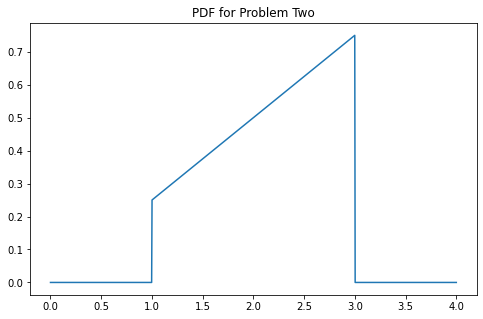

In [28]:
plt.figure(figsize=(8, 5))
plt.title("PDF for Problem Two")
X = np.linspace(0,4,1000)
plt.plot(X,[x/4 if 1 <= x <= 3 else 0 for x in X])
plt.show()

  (A) Determine the formula  for the CDF $F_X$ using geometrical techniques (i.e., not using integrals, but considering what happens to the area to the left of a point $a$ by considering the area of geometrical shapes)
  
  (B) Determine the formula  for the CDF $F_X(x)$ using an integral. 
  
  (C) Plot the CDF $F_X(x)$ (using the code above as a model).
  
  (D) Find $P(X\ge 2)$ 
  
  (E) Find $E(X)$ 
  
Show all work for full credit. 

For (D) -- (E) you must use mathematical techniques and not just calculate it using iterative techniques in Python code. You may use Python to calculate results of mathematical formulae. 

**Solution:**

    A.)
        F(x) = 1/2 * (x-1)*((x/4) - 0.25)) + 0.25 (x-1)
             = 1/2 * (x-1)*(0.25)*(x-1) + 0.25(x-1)
             = 0.25 * (x - 1) * ((x/2) + (1/2))
             
             ANSWER: 0.25 * (x - 1) * ((x/2) + (1/2))
    B.)
    
        F(x) = { ((x^2)/8) - 1/8     for 1 <= x <= 3
                      0              for x < 1
                      1              for x > 3
    
    D.)
        P(X => 2) = 1 - P(X < 2)
                  = 1 - Fx(2)
                  = 1 - (4/8 - 1/8)
                  = 5/8
                  
                  ANSWER = 5/8
    E.)
    
        E(X) = 3 ∫ 1 x(x/4)dx 
             = 3 ∫ 1 (x^2/4)dx
             = x^3/12 
             = 27 - 1 / 12
             = 13/6
             
             ANSWER: 13/6



C.)


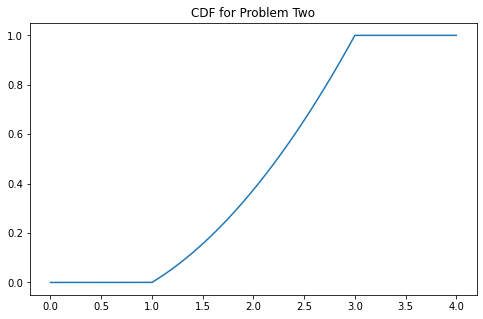

In [29]:
print("C.)")

plt.figure(figsize=(8, 5))
plt.title("CDF for Problem Two")
X = np.linspace(0,4,1000)

def pro(x):
    if x >3:
        return 1
    elif x < 1:
        return 0
    else:
        return (((x**2)/8) - (1/8))
    
plt.plot(X,[pro(x) for x in X])
plt.show()

## Problem Three

The time elapsed, in minutes, between the placement of an order for pizza and its delivery at a particular shop is a uniform RV, with the density function


$$\begin{equation}
    f(x) = \begin{cases}
               1/15               & \text{if } 25<x<40\\
               0         & \text{otherwise}
           \end{cases}
\end{equation}$$

(A) Determine the mean and standard deviation of the time it takes for the piazza shop to deliver pizza.

(B) Suppose that it takes 12 minutes to actually make the pizza after it is ordered. Determine the mean and standard deviation of the time it takes for the delivery person to deliver the pizza, given that the overall time is given as above. 

**Solution:**

    A.) 
        Mean formula = (a + b)/2
        Standard Deviation = (b - a)/ (2*squareroot(3))
        
        [a, b] = [25, 40]
        
        mean = (25 + 40)/2 
             = 32.5
        
        Standard Deviation = (40 - 25)/ (2*squareroot(3))
                           =  4.3301
                           =  4.33
                           
    B.)
        For part [a, b] will be [13, 28] instead of [25, 40]
        mean = (13 + 28)/2 
             = 20.5
             
        Standard Deviation = (28 - 13) / (2*squareroot(3))
                           = 4.3301
                           = 4.33
        

## Problem Four

The lifetime of a tire selected randomly from a used tire shop is $X \times 10^4$ miles (i.e., X returns the lifetime of the tire--in units of miles driven--divided by $10^4$), where $X$ is
a random variable with density function:

$$\begin{equation}
    f(x) = \begin{cases}
               2/x^2               & \text{if } 1<x<2\\
               0         & \text{otherwise}
           \end{cases}
\end{equation}$$
which is displayed below. 

(A) What percentage of the tires of this shop last less than 15,000 miles?

(B) Of the tires specified in (A), what percentage of *those* last between 10,000 and 12,500 miles?

Hint: You can use the Power Rule for integration for negative exponents except for the special case $x^{-1}$; (B) will involve a conditional probability. 

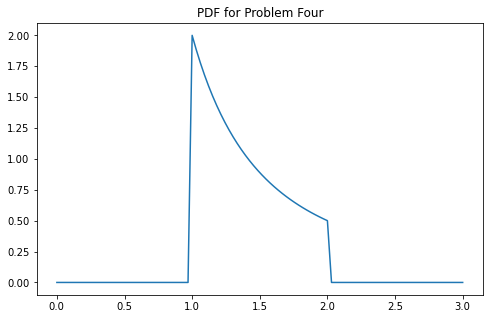

In [30]:
def f4(x):
    if x < 1 or x > 2:
        return 0
    else:
        return 2.0/(x**2)

X = np.linspace(0,3,100)
Y = [f4(x) for x in X]

plt.figure(figsize=(8, 5))
plt.title("PDF for Problem Four")
plt.plot(X,Y)
plt.show()

**Solution:**

    A.) P(10000X < 15000) = P(X < 15000/10000)
                          = P(X < 1.5)
                          
        a = 1, b = 1.5 f(x) = 2/(x^2)
                          
        P(a < X < b) = a ∫ b f(x)dx
                     
        P(X < 1.5) = 1.5 ∫ 1 2/(x^2)dx
                   
                   = 2 (1.5 ∫ 1) x^-2dx
        
                   = 2[x^-1/-1] (limit = 1.5 & 1)   putting in the limits
                   = -2[1/1.5 - 1]
                   
                   = -2[2-3/3]
                   
                   = 2/3
                   
                   = 67%
                   
                   ANSWER = 67%
                  
    B.) P(10000 < 10000X < 12500 | 10000X < 15000) = P(10000/10000 < X < 12500/10000 | X < 15000/10000)
                                                   
                                                   = P(1 < X < 1.25 | X < 1.5)
                                                   
    P(1 < X < 1.25 | X < 1.5) = (1.25 ∫ 1 (2/x^2)dx) / (1.5 ∫ 1 (2/x^2)dx)
    
    = (1.25 ∫ 1 (x^-2)dx) / (1.5 ∫ 1 (x^-2)dx )
    
    = ([(x^-1)/-1] (limit 1.25 and 1) / ([(x^-1)/-1] (limit 1.5 and 1)
    
    = [(1/(5/4) - 1]
    
    = (-1/5) / (-1/3)
    
    = 3/5
    
    ANSWER = 3/5
                     


# Scipy.stats 

For the following, use the statistical functions given at the top of this notebook. 

Also consider using the Distributions Notebook posted online to visualize these distributions (but use scipy.stats for the calculations). 

You are not required to do so, but a nice touch is to print out your answer in a code block, i.e., if
you were asked "What is the probability in the standard normal that a value occurs in the interval between
-0.94 and 1.2 standard deviations from 0," you could answer as follows:

In [31]:
mu = 0
sigma = 1
lo = -0.94
hi = 1.2

answer = norm.cdf(x=hi,loc=mu,scale=sigma) - norm.cdf(x=lo,loc=mu,scale=sigma)
print("Solution: " + str(np.around(answer,4)))

Solution: 0.7113


## Problem Five (Normal Distribution)

Suppose that in a population of individuals, their height is  normally distributed with a mean $\mu =68$ inches and a standard deviation of $\sigma=1.45$ inches. </p>

<p> (A) 
  What is the probability that a randomly-selected individual has a height less than 66 inches?</p>
  
<p>(B) What is the probability that a randomly-selected individual has a height more than 72 inches?</p>

<p>(C) What is the probability that a randomly-selected individual has a height between 66.5 and 71 inches?</p>

<p>(D) What is the maximum height for a person to be in the bottom 1% of the population in terms of height?</p>

<p>(E) To characterize the "middle 50%" of the population in terms of the standard deviation, give the value $k$ in this formula:
    
$$P( | X - \mu_X | < k\cdot\sigma_X ) = 0.5.$$

Note that this does not depend on the exact values for $\mu$ and $\sigma$ given in this problem.  
</p>

Hint: peruse the functions from the `norm` library given in the first code cell above. 
 

In [33]:
print("Solution:")


answer = norm.cdf(x=66,loc=68,scale=1.45)
print("Solution A: " + str(np.around(answer,4)))

answer = norm.sf(x=72,loc=68,scale=1.45)
print("Solution B: " + str(np.around(answer,4)))

answer = norm.cdf(x=71,loc=68,scale=1.45) - norm.cdf(x=66.5,loc=68,scale=1.45)
print("Solution C: " + str(np.around(answer,4)))


answer = norm.isf(q=0.99,loc=68,scale=1.45)
print("Solution D: " + str(np.around(answer,4)))


answer = norm.cdf(x=68,loc=68,scale=1.45) 
print("Solution E: k = " + str(np.around(0,4)))

Solution:
Solution A: 0.0839
Solution B: 0.0029
Solution C: 0.8303
Solution D: 64.6268
Solution E: k = 0


![](hw07.4c.png)

## Problem Six (Truncated Normal Distribution)

The problem with grades is that they are usually normally distributed, but
of course grades can not be any real number, but have upper and lower bounds. Here is a chart of GPAs of 4897 students at a modern university currently on lockdown:

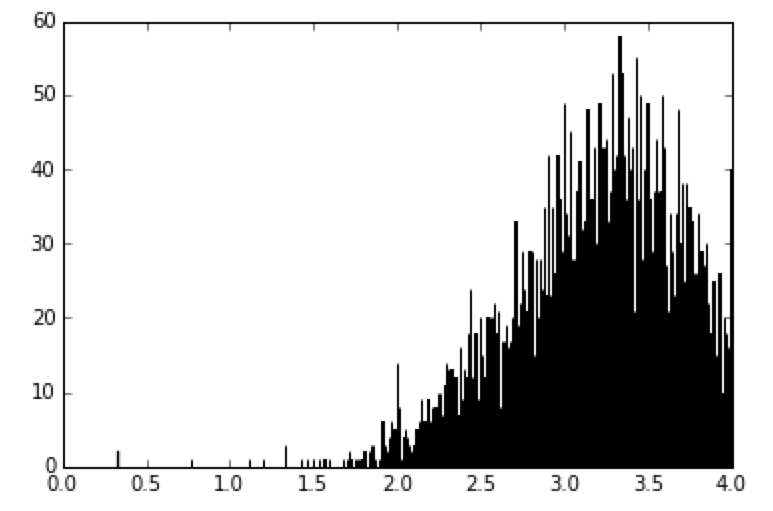

The problem with this, of course, is that a normal distribution seems to fit, but it is truncated at the highest value of 4.0.  How do we deal with this kind of distribution? Hm... it looks like we need to *condition* the problem so that we are only looking at that part of the distribution in the range [0..4], that is

$$P( \,\, \ldots X \ldots \,\,|\,\, 0\le X \le 4 \,\,)$$ 

(realistically you can ignore $X<0$). 

Let us suppose that a normal distribution with mean $mu=3.3$ and variance $\sigma^2=0.4$ describes the overall curve before it was truncated at 4.0 (and 0.0). 

Browse the functions from <code>scipy.stats.norm</code> given in the first code cell above to see which one will solve each problem. 

(A) The BA/MS program requires a 3.0 GPA to apply. What percentage of this group
would be eligible to apply?

(B) Approximately how many students are below 2.0?  (Hint: I mean the actual number of students, not the percentage; figure out the percentage of the total, and round to the nearest integer). 

(C) Latin Honors at this school are calculated as follows:

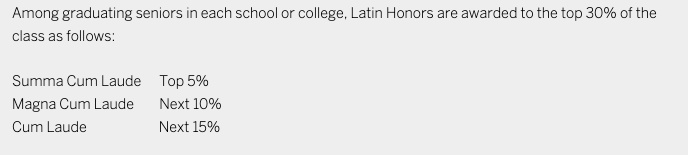

What are the GPA cutoffs for each of these honors?

Hint for (C):  You must reduce the percentages appropriately, since you are looking for
a percentage of the values below 4.0. For example, for Summa, you are looking
for $k$ such that

$$P(\,k<X<4 \,|\, 0<X<4)\,=\,0.05$$

which turns into

$$P(\,k<X<4)\,=\,0.05 * P(0<X<4).$$

Now you can use the Python library to calculate, but don't forget about accounting for
the part of the curve above $4$, i.e., $P(X>4)$. 

In [34]:
k = norm.cdf(x = 4, loc = 3.3, scale = 0.63) - norm.cdf(x = 0, loc = 3.3, scale = 0.63)
solution = (norm.cdf(x=4.0,loc=3.3,scale= 0.63) - norm.cdf(x=3.0,loc=3.3,scale= 0.63)) / k
print("Solution A: " + str(np.round(solution * 100)) + "%")

solution = (norm.cdf(x=2, loc=3.3, scale = 0.63) - norm.cdf(x=0, loc=3.3, scale = 0.63)) / k
print("Solution B: " + (str)(np.round(solution*4897,0)))

k = norm.sf(x=4,loc=3.3,scale=0.63) 
answer = norm.isf(q=(k+(0.05*in_range)),loc=3.3,scale=0.63)
print("Solution C:")
print("c1.) (5%), " + str(np.round(answer, 4)))
answer = norm.isf(q=(k+(0.15*in_range)),loc=3.3,scale=0.63)
print("c2.) (10%), " + str(np.round(answer, 4)))
answer = norm.isf(q=(k+(0.30*in_range)),loc=3.3,scale=0.63)
print("c3.) (15%), " + str(np.round(answer, 4)))

Solution A: 63.0%
Solution B: 110.0
Solution C:
c1.) (5%), 3.8849
c2.) (10%), 3.699
c3.) (15%), 3.4706


<strong>Solution:</strong>


    

## Problem Seven (Combining Normal with Other Distributions)

Suppose that in the Men's Olympic Ski Team, the chest size measurements are normally distributed with a mean of 39.8 inches and a standard deviation of 2.05 inches.


(A) What the probability that of 20 randomly selected members of the team, at least 5 have a chest size of at least 41.7 inches?

(B) Supposing we choose men on the team repeatedly and with replacement, how many men would you expect to choose before finding a member with a chest measurement of less than 37 inches?

Hint: Let X is a normally distributed random variable according to the parameters given in the first sentence. Then consider Y and Z be appropriately distributed random variables for (A) and (B) respectively. 

**Solution:**

    A.) 
        Mean of 39.8 inches
        standard deviation of 2.05
        
        X ~ Norm(39.8, 2.05)
        
        Prob chest is at least 41.7:
        
        P(X => 41.7) = 
        
        P( C > (41.7 - 39.8)/(2.05) ) = P( C > 0.9268)
        
        If you check the tables you will see that 
        
        **P( C > 0.9268) = 0.1770
        
        Y ~ Bin(20, 0.1770)
        
        P(Y => 5) = 1 - P( Y <= 4)
                  = 1 - P(0) + P(1) + P(2) + P(3) + P(4)
                  = 0.2725
                  
        ANSWER: 0.2725
        
    B.)
        Prob chest is less than 37:
        
        P(X < 37) = 
        
        = P( C < (37 - 39.8)/(2.05) )
        
        = P( C < -1.37)
        
        = 0.0860     got it from the tables
        
        
        1/p
        
        = 1/0.0860
        
        
        = 11.63 ~ 12
        
        ANSWER: 12
        
        
        
        
        
        
        
                      


## Generating Variates from a Continuous Distribution

Samples from a given distribution are often called "random variates" or just "variates" for short; to 
generate <i>size</i> random variates from a normal distribution with mean <i>loc</i> and standard 
deviation <i> scale </i> we can use the <code>scipy.stats</code> function 
<pre>
 X = norm.rvs(loc=0,scale=1,size=num_trials)
</pre>

(Note that in this case, the normal is defined in terms of the standard devation, and <i>not</i> the variance.)

Run the next cell several times to get a sense for how this function works

In [41]:
print("From N(0,1):")
X = norm.rvs()       # default is a standard normal with mean 0 and standard deviation 1
print(X)
print()
print("From N(10,2^2):")
X = norm.rvs(10,2)   # defined by mean and standard deviation (NOT the variance)
print(X)
print()
print("Ten  variates from N(66,3^2):")
X = norm.rvs(66,3,size=10)
print(X)


From N(0,1):
-0.34314213870982474

From N(10,2^2):
7.564842631228561

Ten  variates from N(66,3^2):
[66.51871939 72.58611599 71.55605481 70.16322375 68.26860668 65.53891874
 64.01057866 61.01295656 65.91082644 62.17803067]


### Graphing Continuous Variates: A Problem
So generating normal variates is easy! What we are going to concern ourselves with in this next problem is now to graph a collection of such normal numbers. 

Here is the problem: since each value occurs (with high probability) only once, we can't just create a histogram and convert it into a frequency distribution. 

Here is what happens if we do this, and graph it as a scatter plot against the theoretical (continuous) distribution:

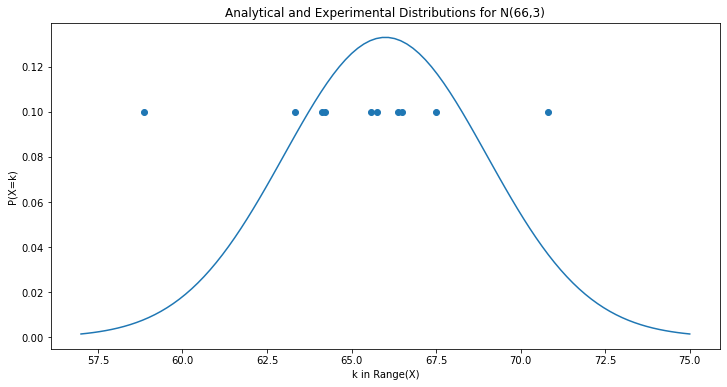

In [28]:
def display_normal_samples(mu,sigma,num_trials):
    fig, ax = plt.subplots(1,1,figsize=(12,6))
    plt.title('Analytical and Experimental Distributions for N('+str(mu)+','+str(sigma)+')')
    plt.ylabel("P(X=k)")
    plt.xlabel("k in Range(X)")
    # use normal(...) to generate random samples
    X = sorted(norm.rvs(mu,sigma,num_trials))
    # Now convert frequency counts into probabilities
    D = Counter( X )
    P = [D[k]/num_trials for k in X]
    plt.scatter(X,P)
    # Now generate the theoretical normal with the same mean and 
    X2 = np.linspace(mu-sigma*3,mu+sigma*3,100)
    Y = [norm.pdf(x,mu,sigma) for x in X2]
    plt.plot(X2,Y)
    plt.show()

# try setting the number of trials - the number of samples generated -- to 100 and 1000.
num_trials = 10
display_normal_samples(66,3,num_trials)




### Graphing Continuous Variates with Bins
You see the problem: since each floating point number (an approximation of a real number) is 
    generated with high probability at most once, we can't see the accumulation of samples that would
    indicate the probability.  
Essentially we are trying to create a frequency distribution from values whose theoretical probability is 0. What to do? 

  Well, you know that probabilities can only be calculated in continuous distributions using <i>intervals</i>, so we will create equally-sized intervals to collect together our samples from the continuous distribution. Then we must "slot" each variate into its appropriate bin and calculate the probabilities. 

Thus, we transform a continuous distribution into a discrete one for the purposes of visualizing it.    
    
    
The pyplot function hist(...) does the slotting, if we give it a list of outcomes and the bin boundaries, so
that really all we have to do is define the bins. 

### Graphing Normal Variates with Bins Calculated from Standard Deviation

For the normal distribution it makes sense to define the bin boundaries in terms of standard deviations from the mean, since we will be dealing with an unknown range of data; this bins can be made as wide or as narrow as we want, but will represent an interval defined in terms of the standard deviation sigma of the distribution. 

We will graph the distribution in a range of at least 4 standard deviations of the mean, ignoring the rare occurance of a variate outside this range. 

In [29]:
# Define the boundaries of bins with the specified width around the mean, 
# to plus/minus at least 4 * sigma

# bin_width is in units of sigma, so bin_width = 0.1 means sigma/10

def makeBins(mu,sigma,bin_width):
    numBins = ceil(4/bin_width)
    bins = [mu+sigma*bin_width*x for x in range(-numBins,numBins+1)]
    return bins

# Change the parameters several times to see the effect of this

print(makeBins(0,1,.5))
           

[-4.0, -3.5, -3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]


## Problem Eight: Generating and Graphing Normal Variates

### How does the number of trials affect the fit of the data to the normal distribution?
Now let's do our previous experiment but trying various 
values for `bin_width`...

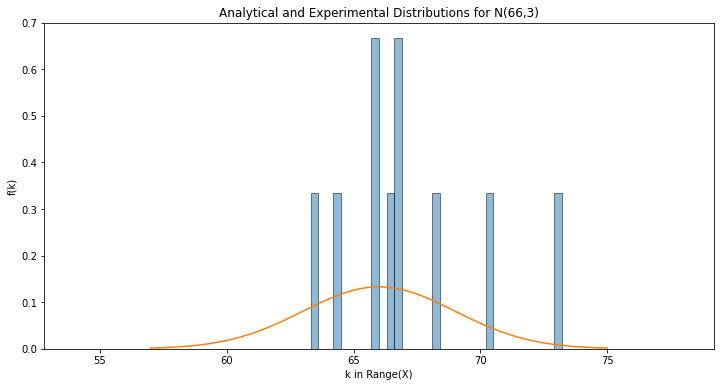

In [30]:
def display_normal_samples_binned(mu,sigma,num_trials,bin_widths):
    fig, ax = plt.subplots(1,1,figsize=(12,6))
    plt.title('Analytical and Experimental Distributions for N('+str(mu)+','+str(sigma)+')')
    plt.ylabel("f(k)")
    plt.xlabel("k in Range(X)")
    # use norm.rvs(...) to generate random samples
    X = norm.rvs(mu,sigma,num_trials)
    plt.hist(X,bins=makeBins(mu,sigma,bin_widths),density=True,edgecolor='k',alpha=0.5) # bins are of width 1/10**decimals
    #plt.hist(X,bins=makeBins(mu,sigma,bin_widths),density=True,edgecolor='k',alpha=0.5) # use if get warning
    # Now generate the theoretical normal with the same mean and 
    X2 = np.linspace(mu-sigma*3,mu+sigma*3,100)
    Y = [norm.pdf(x,mu,sigma) for x in X2]
    plt.plot(X2,Y)
    plt.show()
    
#try each of these and observe the effects

N = 10     # try 100, 1000, and 1,000,000

display_normal_samples_binned(66,3,N,0.1)       
   

<b>Clearly the data seems to fit the normal better when the number of trials increases...</b>

### Affect of the bin width

But now let's think about the issue of precision, i.e., the width of the bins.
Again, try each of the following and see what happens. You can see that too-wide bins don't give much information, but too-narrow bins don't show how the data fits the normal distribution. There is a relationship between the number of data points and the width of the bins.

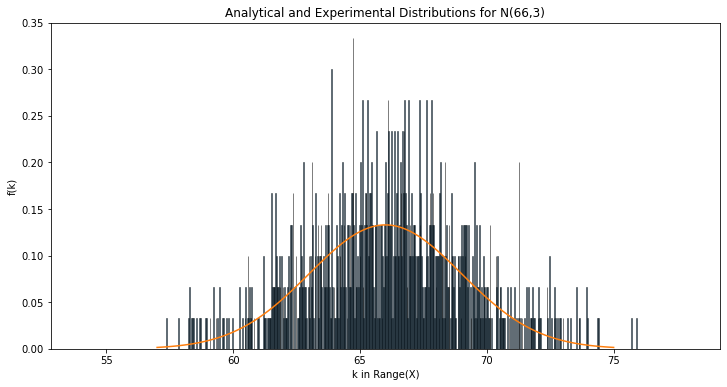

In [31]:
bin_width = 0.01       # try changing this to 0.5, 0.2, 0.1, 0.05, and 0.01

display_normal_samples_binned(66,3,1000,bin_width)

### Part (A)
Clearly the "fit" with the normal curve depends on the width of the bins!
For the following three examples, find a value for the indicated parameter which gives a good correspondence
between the normal curve and the data. 

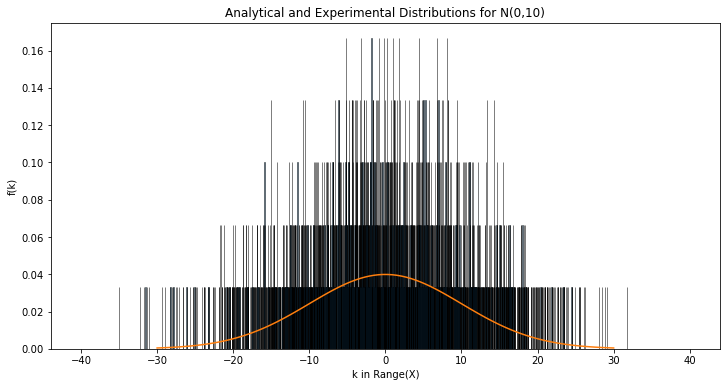

In [32]:
# Problem 1(a)
bin_width = 0.001   # experiment with this value 0.01, 0.05, 0.1, 0.15, etc. -- find the 
                    # largest number which still gives a good fit
    
display_normal_samples_binned(0,10,3000,bin_width)     # don't change this line


### Part (B)

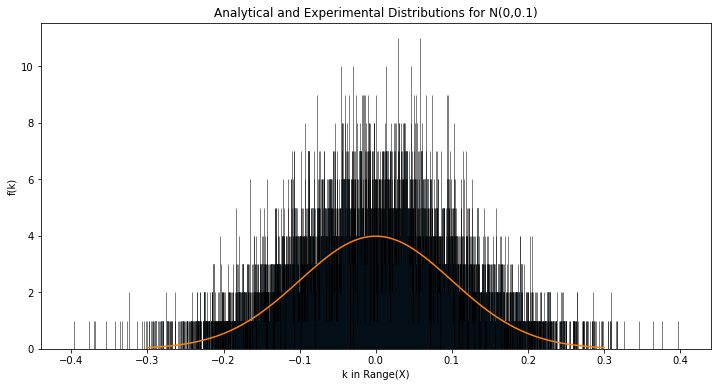

In [33]:
# Problem 1(b)

bin_width = 0.001     # experiment with this value -- find the largest number which still 
                  #. gives a good fit

display_normal_samples_binned(0,0.1,10000,bin_width)     # don't change this line



### Part (C)

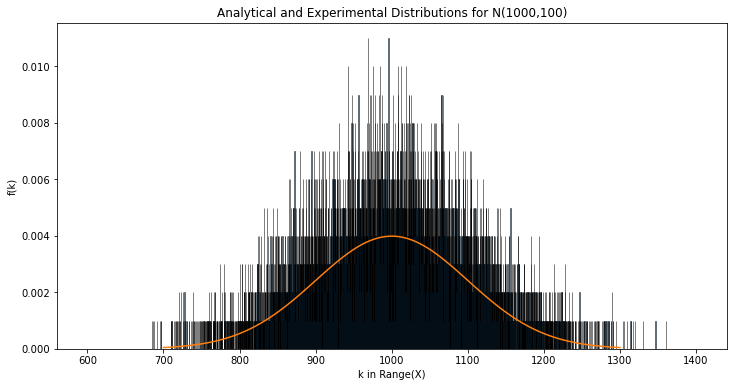

In [34]:
# Problem 11(c)

bin_width = 0.001    # experiment with this value -- find the largest number which still 
                     # gives a good fit

display_normal_samples_binned(1000,100,10000,bin_width)     # don't change this line



### Part (D)

What do you think is a good value for `bin_width` in general, assuming that `num_trials` is 
sufficient to give a reasonable approximation of the normal distribution?


**Solution:** 